First, create a new conda environment named BI2025 and install the required packages from requirements.txt


In [1]:
# !conda create -n BI2025 python=3.11 -y
# !conda activate BI2025
!pip install -r requirements.txt

  Cloning https://github.com/AllStarsAT/starvers.git to c:\users\ibrar\appdata\local\temp\pip-install-kw0ody54\starvers_750ffaa2b9514bb7aaa8eff3b55107e4
  Resolved https://github.com/AllStarsAT/starvers.git to commit 5e6e112e2b37cb5a27af9585bd572d27187ef735
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/AllStarsAT/starvers.git 'C:\Users\ibrar\AppData\Local\Temp\pip-install-kw0ody54\starvers_750ffaa2b9514bb7aaa8eff3b55107e4'


In [2]:
# DO NOT MODIFY OR COPY THIS CELL!! 
# Note: The only imports allowed are Python's standard library, pandas, numpy, scipy, matplotlib, seaborn and scikit-learn
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import typing
import requests
import time
import shutil
import json
from starvers.starvers import TripleStoreEngine

## Graph-based documentation preliminaries

**!!!IMPORTANT!!!**

Everytime you work on this notebook, enter your student ID in the `executed_by` variable so that the cell executions are accredited to you.

In [3]:
executed_by ='stud-id_12350094'  # Replace the digits after "id_" with your own student ID

Set your group and student IDs. Do this only once.

In [4]:
# group id for this project
group_id = '16'  # Replace the digits with your group id

# Students working on this notebook
student_a = 'stud-id_12350094'  # Replace the digits after "id_" with student A's student ID
student_b = 'stud-id_11826186'  # Replace the digits after "id_" with student B's student ID

In [5]:
# Roles. Don't change these values.
code_writer_role = 'code_writer'
code_executor_role = 'code_executor'

Setup the starvers API for logging your steps into our server-sided graph database.

In [6]:
get_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025"
post_endpoint = "https://starvers.ec.tuwien.ac.at/BI2025/statements"
engine = TripleStoreEngine(get_endpoint, post_endpoint, skip_connection_test=True)

Use these prefixes in your notebooks. You can extend this dict with your prefixes of additional ontologies that you use in this notebook. Replace 00 with your group id

In [7]:
prefixes = {
    'xsd': 'http://www.w3.org/2001/XMLSchema#',
    'rdfs': 'http://www.w3.org/2000/01/rdf-schema#',
    'foaf': 'http://xmlns.com/foaf/0.1/',
    'prov': 'http://www.w3.org/ns/prov#',
    'sc': 'https://schema.org/',
    'cr': 'http://mlcommons.org/croissant/',
    'mls': 'http://www.w3.org/ns/mls#',
    'mlso': 'http://w3id.org/mlso',
    'siu': 'https://si-digital-framework.org/SI/units/',
    'siq': 'https://si-digital-framework.org/SI/quantities/',
    'qudt': 'http://qudt.org/schema/qudt/',
    '': f'https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/',
}

prefix_header = '\n'.join([f'PREFIX {k}: <{v}>' for k, v in prefixes.items()]) + '\n\n'

Ontologies to use
* Provenance of the experiment process
    * PROV-O: 
        * doc: https://www.w3.org/TR/prov-o/
        * serialization: https://www.w3.org/ns/prov-o
* Data used and created
    * schema.org - Dataset: 
        * doc: https://schema.org/Dataset
        * serialization: https://schema.org/version/latest/schemaorg-current-https.ttl
    * Crossaint
        * doc: https://docs.mlcommons.org/croissant/docs/croissant-spec.html
        * serialization: https://github.com/mlcommons/croissant/blob/main/docs/croissant.ttl
* ML experiments performed
    * MLSO: 
        * doc: https://github.com/dtai-kg/MLSO
        * doc: https://dtai-kg.github.io/MLSO/#http://w3id.org/
        * serialization: https://dtai-kg.github.io/MLSO/ontology.ttl
* Measurements, Metrics, Units
    * QUDT
        * doc:https://qudt.org/
        * doc: https://github.com/qudt/qudt-public-repo
        * serialization: https://github.com/qudt/qudt-public-repo/blob/main/src/main/rdf/schema/SCHEMA_QUDT.ttl
    * SI Digital Framework
        * doc: https://github.com/TheBIPM/SI_Digital_Framework/blob/main/SI_Reference_Point/docs/README.md
        * doc: https://si-digital-framework.org/
        * doc: https://si-digital-framework.org/SI
        * serialization: https://github.com/TheBIPM/SI_Digital_Framework/blob/main/SI_Reference_Point/TTL/si.ttl
    * Quantities and Units
        * doc: https://www.omg.org/spec/Commons
        * serialization: https://www.omg.org/spec/Commons/QuantitiesAndUnits.ttl

Use this function to record execution times.

In [8]:
def now() -> str:
    """
    Returns the current time in ISO 8601 format with UTC timezone in the following format:
    YYYY-MM-DDTHH:MM:SS.sssZ
    """
    timestamp = datetime.datetime.now(datetime.timezone.utc)
    timestamp_formated = timestamp.strftime("%Y-%m-%dT%H:%M:%S.%f")[:-3]  +"Z"

    return timestamp_formated

Register yourself in the Knowledge Graph using ProvO. Change the given name, family name and immatriculation number to reflect your own data.

In [9]:
# Ontologies used: foaf, prov, IAO
reigstration_triples_a = [
f':{student_a} rdf:type foaf:Person .',
f':{student_a} rdf:type prov:Agent .',
f':{student_a} foaf:givenName "Muhammad" .',
f':{student_a} foaf:familyName "Ibrar" .',
f':{student_a} <http://vivoweb.org/ontology/core#identifier> :{student_a} .',
f':{student_a} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_a} <http://www.w3.org/2000/01/rdf-schema#label> "12350094" .',
f':{student_a} <http://purl.obolibrary.org/obo/IAO_0000219> "01234567"^^xsd:string .',
]

reigstration_triples_b = [
f':{student_b} rdf:type foaf:Person .',
f':{student_b} rdf:type prov:Agent .',
f':{student_b} foaf:givenName "Ahmad" .',
f':{student_b} foaf:familyName "Ibrahim" .',
f':{student_b} <http://vivoweb.org/ontology/core#identifier> :{student_b} .',
f':{student_b} rdf:type <http://purl.obolibrary.org/obo/IAO_0000578> .',
f':{student_b} <http://www.w3.org/2000/01/rdf-schema#label> "11826186" .',
f':{student_b} <http://purl.obolibrary.org/obo/IAO_0000219> "76543210"^^xsd:string .',
]

role_triples = [
    f':{code_writer_role} rdf:type prov:Role .',
    f':{code_executor_role} rdf:type prov:Role .',
]


engine.insert(reigstration_triples_a, prefixes=prefixes)
engine.insert(reigstration_triples_b, prefixes=prefixes)
engine.insert(role_triples, prefixes=prefixes)

**What not do do**

Do not use [blank nodes](https://www.w3.org/wiki/BlankNodes).

PROV-O uses blank nodes to connect multiple elements with each other.
Such blank nodes (such as _:association) should not be used.
Instead, assign a fixed node ID such as
:5119fcd7-b571-41e0-9464-a37c7be0f574 by generating them outside of the
notebook.
We suggest that, for each setting where such a blank node is needed to
connect multiple elements, you create a unique hash (using uuid.uuid4())
and keep this as hard-coded identifier for the blank node. The template
notebook contains examples of this. Do *not* use these provided values,
as otherwise, your provenance documentations will all be connected via
these identifiers!
Also, do not generate them dynamically in every cell execution, e.g. by
using uuid.uuid4() in a cell. This would generate many new linking nodes
for connecting the same elements.
Compute one for each node (cell) where you need them and make sure to
use the same one on each re-execution of the notebook.

In [10]:
# weather_data_path = os.path.join("data", "datasets", "weather")
# cyclists_data_path = os.path.join("data", "datasets", "cyclists")
mobile_price_data_path = os.path.join("data", "datasets", "mobile_price")


## Business Understanding 

In [11]:
## Each Activity that follows is part of the Business Understanding Phase

business_understanding_phase_executor = [
f':business_understanding_phase rdf:type prov:Activity .',
f':business_understanding_phase rdfs:label "Business Understanding Phase" .', ## Phase 1: Business Understanding
]
engine.insert(business_understanding_phase_executor, prefixes=prefixes)


In [12]:
#############################################
# Documentation
#############################################

data_src_and_scenario_comment = """
Data Source:
The dataset is the Kaggle “Mobile Price Classification” dataset containing 2,000 mobile phones. Each phone is described by 20 technical features (battery power, RAM, internal memory, camera specs, connectivity options, screen dimensions, etc.) and one target variable price_range with four classes (0 = low, 3 = very high).

Scenario:
A new mobile company wants to price upcoming phone models competitively against major brands. Instead of relying only on expert judgment, the company wants to analyze historical specifications of phones and their corresponding price ranges to support pricing decisions.
"""

business_objectives_comment = """
1. Support pricing decisions by predicting the most suitable price range for new phone models.
2. Reduce manual effort and time required to estimate price categories.
3. Improve product positioning in budget, mid-range, high-end, and flagship segments.
4. Increase transparency on how technical features influence pricing decisions.
"""

business_success_criteria_comment = """
1. The ML system is regularly used by product and pricing teams.
2. At least a 30% reduction in time needed for initial price-range estimation.
3. Most new models (>80%) remain in the initially selected price band after launch.
4. Pricing decisions become more consistent and data-driven across phone segments.
"""

data_mining_goals_comment = """
1. Build a multi-class classifier predicting the price_range (0–3) from 20 phone features.
2. Achieve robust accuracy on unseen data and generalize well to new configurations.
3. Identify important features (e.g., RAM, pixel resolution) influencing the price range.
4. Provide probability outputs to support uncertainty-aware pricing decisions.
"""

data_mining_success_criteria_comment = """
1. Achieve ≥90% accuracy on the validation/test set.
2. Macro F1-score ≥0.88 with no class having recall <0.80.
3. Model performance remains stable across different random splits.
4. Probabilities are reasonably calibrated for business decision use.
"""

ai_risk_aspects_comment = """
1. Misclassification may lead to wrong pricing decisions, affecting revenue or sales.
2. The dataset may not reflect future devices; model drift is a risk.
3. Over-reliance on the model could cause poor decisions without expert review.
4. Although no personal data is used, systematic bias across device categories is possible.
5. Pricing logic leakage is a business security risk if the model is exposed externally.
"""


bu_ass_uuid_executor = "bb6a40f9-9d92-4f9f-bbd2-b65ef6a82da2" # Generate once
business_understanding_executor = [
f':business_understanding rdf:type prov:Activity .',
f':business_understanding sc:isPartOf :business_understanding_phase .', # Connect Activity to Parent Business Understanding Phase Activity
f':business_understanding prov:qualifiedAssociation :{bu_ass_uuid_executor} .',
f':{bu_ass_uuid_executor} prov:agent :{executed_by} .',
f':{bu_ass_uuid_executor} rdf:type prov:Association .',
f':{bu_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(business_understanding_executor, prefixes=prefixes)


business_understanding_data_executor = [
# 1a
f':bu_data_source_and_scenario rdf:type prov:Entity .',
f':bu_data_source_and_scenario prov:wasGeneratedBy :business_understanding .',
f':bu_data_source_and_scenario rdfs:label "1a Data Source and Scenario" .',
f':bu_data_source_and_scenario rdfs:comment """{data_src_and_scenario_comment}""" .',
# 1b
f':bu_business_objectives rdf:type prov:Entity .',
f':bu_business_objectives prov:wasGeneratedBy :business_understanding .',
f':bu_business_objectives rdfs:label "1b Business Objectives" .',
f':bu_business_objectives rdfs:comment """{business_objectives_comment}""" .',
# 1c
f':bu_business_success_criteria rdf:type prov:Entity .',
f':bu_business_success_criteria prov:wasGeneratedBy :business_understanding .',
f':bu_business_success_criteria rdfs:label "1c Business Success Criteria" .',
f':bu_business_success_criteria rdfs:comment """{business_success_criteria_comment}""" .',
# 1d
f':bu_data_mining_goals rdf:type prov:Entity .',
f':bu_data_mining_goals prov:wasGeneratedBy :business_understanding .',
f':bu_data_mining_goals rdfs:label "1d Data Mining Goals" .',
f':bu_data_mining_goals rdfs:comment """{data_mining_goals_comment}""" .',
# 1e
f':bu_data_mining_success_criteria rdf:type prov:Entity .',
f':bu_data_mining_success_criteria prov:wasGeneratedBy :business_understanding .',
f':bu_data_mining_success_criteria rdfs:label "1e Data Mining Success Criteria" .',
f':bu_data_mining_success_criteria rdfs:comment """{data_mining_success_criteria_comment}""" .',
# 1f
f':bu_ai_risk_aspects rdf:type prov:Entity .',
f':bu_ai_risk_aspects prov:wasGeneratedBy :business_understanding .',
f':bu_ai_risk_aspects rdfs:label "1f AI risk aspects" .',
f':bu_ai_risk_aspects rdfs:comment """{ai_risk_aspects_comment}""" .',

]
engine.insert(business_understanding_data_executor, prefixes=prefixes)

## Data Understanding

The following pseudo-code & pseudo-documentation may be used as a hint.

In [13]:
## Each Activity that follows is part of the Data Understanding Phase

business_understanding_phase_executor = [
f':data_understanding_phase rdf:type prov:Activity .',
f':data_understanding_phase rdfs:label "Data Understanding Phase" .', 
]
engine.insert(business_understanding_phase_executor, prefixes=prefixes)


In [14]:
data_path  = os.path.join("data", "datasets", "mobile_price")
load_mobile_data_code_writer = student_a
def load_mobile_data()-> pd.DataFrame:

    ### Load your data
    input_file = os.path.join(data_path, 'train.csv')
    df = pd.read_csv(input_file)
    return df

start_time_ld = now()
data = load_mobile_data()
end_time_ld = now()

display(data.head())

#############################################
# Documentation
#############################################

# Now document the raw data and the loaded data using appropriate ontologies.

# Always add these triples for every activity to define the executor!
ld_ass_uuid_executor = "b8bac193-c4e6-4e31-9134-b23e001e279c"  # Generate once
load_mobile_data_executor = [
    f':load_mobile_data prov:qualifiedAssociation :{ld_ass_uuid_executor} .',
    f':{ld_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{ld_ass_uuid_executor} rdf:type prov:Association .',
    f':{ld_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(load_mobile_data_executor, prefixes=prefixes)

ld_ass_uuid_writer = "c600e15c-87a9-4e2a-be85-b6c2a3014210"  # Generate once
ld_report = """
Load the mobile price classification training data from train.csv and create
a pandas DataFrame with 2000 rows and 21 columns (20 features + 1 target price_range).
"""

load_mobile_data_activity = [
    # Activity itself
    ':load_mobile_data rdf:type prov:Activity .',
    ':load_mobile_data sc:isPartOf :data_understanding_phase .',
    ':load_mobile_data rdfs:comment "Data Understanding" .',
    f':load_mobile_data rdfs:comment """{ld_report}""" .',
    f':load_mobile_data prov:startedAtTime "{start_time_ld}"^^xsd:dateTime .',
    f':load_mobile_data prov:endedAtTime "{end_time_ld}"^^xsd:dateTime .',

    # Code writer association
    f':load_mobile_data prov:qualifiedAssociation :{ld_ass_uuid_writer} .',
    f':{ld_ass_uuid_writer} prov:agent :{load_mobile_data_code_writer} .',
    f':{ld_ass_uuid_writer} rdf:type prov:Association .',
    f':{ld_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # INPUT of activity
    ':load_mobile_data prov:used :raw_data .',
    ':load_mobile_data prov:used :raw_data_path .',
    ':raw_data rdf:type prov:Entity .',
    ':raw_data_path rdf:type prov:Entity .',
    ':raw_data prov:wasDerivedFrom :raw_data_path .',

    # OUTPUT of activity
    ':data rdf:type prov:Entity .',
    ':data prov:wasGeneratedBy :load_mobile_data .',
    ':data prov:wasDerivedFrom :raw_data .',
]
engine.insert(load_mobile_data_activity, prefixes=prefixes)

# Further describe the raw data using Croissant
raw_data_triples = [
    # Dataset level
    ':raw_data rdf:type sc:Dataset .',
    ':raw_data sc:name "Mobile Price Classification dataset (raw)" .',
    ':raw_data sc:description "Kaggle mobile phone specifications with price_range labels (0–3) for 2000 phones." .',

    # File / distribution
    ':mobile_price_csv rdf:type cr:FileObject .',
    ':mobile_price_csv sc:name "train.csv" .',
    ':mobile_price_csv sc:encodingFormat "text/csv" .',
    ':raw_data sc:distribution :mobile_price_csv .',

    # RecordSet describing the tabular structure
    ':raw_recordset rdf:type cr:RecordSet .',
    ':raw_recordset sc:name "Table of mobile phone specifications and price range" .',
    ':raw_recordset cr:source :mobile_price_csv .',
    ':raw_data cr:recordSet :raw_recordset .',

    # === Fields: one entry per column in df.info() ===

    # 0 battery_power
    ':raw_recordset cr:field :field_battery_power .',
    ':field_battery_power rdf:type cr:Field .',
    ':field_battery_power sc:name "battery_power" .',
    ':field_battery_power sc:description "Total energy the battery can store in one charge (mAh)." .',
    ':field_battery_power cr:dataType xsd:integer .',

    # 1 blue
    ':raw_recordset cr:field :field_blue .',
    ':field_blue rdf:type cr:Field .',
    ':field_blue sc:name "blue" .',
    ':field_blue sc:description "Binary indicator (0/1) whether the phone has Bluetooth support." .',
    ':field_blue cr:dataType xsd:integer .',

    # 2 clock_speed
    ':raw_recordset cr:field :field_clock_speed .',
    ':field_clock_speed rdf:type cr:Field .',
    ':field_clock_speed sc:name "clock_speed" .',
    ':field_clock_speed sc:description "Maximum clock speed of the microprocessor (GHz)." .',
    ':field_clock_speed cr:dataType xsd:double .',

    # 3 dual_sim
    ':raw_recordset cr:field :field_dual_sim .',
    ':field_dual_sim rdf:type cr:Field .',
    ':field_dual_sim sc:name "dual_sim" .',
    ':field_dual_sim sc:description "Binary indicator (0/1) whether the phone supports dual SIM." .',
    ':field_dual_sim cr:dataType xsd:integer .',

    # 4 fc
    ':raw_recordset cr:field :field_fc .',
    ':field_fc rdf:type cr:Field .',
    ':field_fc sc:name "fc" .',
    ':field_fc sc:description "Front camera resolution in megapixels." .',
    ':field_fc cr:dataType xsd:integer .',

    # 5 four_g
    ':raw_recordset cr:field :field_four_g .',
    ':field_four_g rdf:type cr:Field .',
    ':field_four_g sc:name "four_g" .',
    ':field_four_g sc:description "Binary indicator (0/1) whether the phone supports 4G." .',
    ':field_four_g cr:dataType xsd:integer .',

    # 6 int_memory
    ':raw_recordset cr:field :field_int_memory .',
    ':field_int_memory rdf:type cr:Field .',
    ':field_int_memory sc:name "int_memory" .',
    ':field_int_memory sc:description "Internal memory size of the phone (in GB)." .',
    ':field_int_memory cr:dataType xsd:integer .',

    # 7 m_dep
    ':raw_recordset cr:field :field_m_dep .',
    ':field_m_dep rdf:type cr:Field .',
    ':field_m_dep sc:name "m_dep" .',
    ':field_m_dep sc:description "Mobile depth (thickness) in cm." .',
    ':field_m_dep cr:dataType xsd:double .',

    # 8 mobile_wt
    ':raw_recordset cr:field :field_mobile_wt .',
    ':field_mobile_wt rdf:type cr:Field .',
    ':field_mobile_wt sc:name "mobile_wt" .',
    ':field_mobile_wt sc:description "Weight of the mobile phone in grams." .',
    ':field_mobile_wt cr:dataType xsd:integer .',

    # 9 n_cores
    ':raw_recordset cr:field :field_n_cores .',
    ':field_n_cores rdf:type cr:Field .',
    ':field_n_cores sc:name "n_cores" .',
    ':field_n_cores sc:description "Number of cores of the processor (1–8)." .',
    ':field_n_cores cr:dataType xsd:integer .',

    # 10 pc
    ':raw_recordset cr:field :field_pc .',
    ':field_pc rdf:type cr:Field .',
    ':field_pc sc:name "pc" .',
    ':field_pc sc:description "Primary camera resolution in megapixels." .',
    ':field_pc cr:dataType xsd:integer .',

    # 11 px_height
    ':raw_recordset cr:field :field_px_height .',
    ':field_px_height rdf:type cr:Field .',
    ':field_px_height sc:name "px_height" .',
    ':field_px_height sc:description "Pixel resolution height of the mobile display." .',
    ':field_px_height cr:dataType xsd:integer .',

    # 12 px_width
    ':raw_recordset cr:field :field_px_width .',
    ':field_px_width rdf:type cr:Field .',
    ':field_px_width sc:name "px_width" .',
    ':field_px_width sc:description "Pixel resolution width of the mobile display." .',
    ':field_px_width cr:dataType xsd:integer .',

    # 13 ram
    ':raw_recordset cr:field :field_ram .',
    ':field_ram rdf:type cr:Field .',
    ':field_ram sc:name "ram" .',
    ':field_ram sc:description "Random Access Memory size in MB." .',
    ':field_ram cr:dataType xsd:integer .',

    # 14 sc_h
    ':raw_recordset cr:field :field_sc_h .',
    ':field_sc_h rdf:type cr:Field .',
    ':field_sc_h sc:name "sc_h" .',
    ':field_sc_h sc:description "Screen height of the mobile in cm." .',
    ':field_sc_h cr:dataType xsd:integer .',

    # 15 sc_w
    ':raw_recordset cr:field :field_sc_w .',
    ':field_sc_w rdf:type cr:Field .',
    ':field_sc_w sc:name "sc_w" .',
    ':field_sc_w sc:description "Screen width of the mobile in cm." .',
    ':field_sc_w cr:dataType xsd:integer .',

    # 16 talk_time
    ':raw_recordset cr:field :field_talk_time .',
    ':field_talk_time rdf:type cr:Field .',
    ':field_talk_time sc:name "talk_time" .',
    ':field_talk_time sc:description "Longest time that a single battery charge will last during continuous calls (hours)." .',
    ':field_talk_time cr:dataType xsd:integer .',

    # 17 three_g
    ':raw_recordset cr:field :field_three_g .',
    ':field_three_g rdf:type cr:Field .',
    ':field_three_g sc:name "three_g" .',
    ':field_three_g sc:description "Binary indicator (0/1) whether the phone supports 3G." .',
    ':field_three_g cr:dataType xsd:integer .',

    # 18 touch_screen
    ':raw_recordset cr:field :field_touch_screen .',
    ':field_touch_screen rdf:type cr:Field .',
    ':field_touch_screen sc:name "touch_screen" .',
    ':field_touch_screen sc:description "Binary indicator (0/1) whether the phone has a touch screen." .',
    ':field_touch_screen cr:dataType xsd:integer .',

    # 19 wifi
    ':raw_recordset cr:field :field_wifi .',
    ':field_wifi rdf:type cr:Field .',
    ':field_wifi sc:name "wifi" .',
    ':field_wifi sc:description "Binary indicator (0/1) whether the phone supports WiFi." .',
    ':field_wifi cr:dataType xsd:integer .',

    # 20 price_range (target)
    ':raw_recordset cr:field :field_price_range .',
    ':field_price_range rdf:type cr:Field .',
    ':field_price_range sc:name "price_range" .',
    ':field_price_range sc:description "Target: price category of the mobile (0=low, 1=medium, 2=high, 3=very high)." .',
    ':field_price_range cr:dataType xsd:integer .',
]
engine.insert(raw_data_triples, prefixes=prefixes)

# Also the output of the load activity is a dataset that can be described with Croissant
data_triples = [
    ':data rdf:type sc:Dataset .',
    ':data sc:name "Loaded mobile price classification data" .',
    ':data sc:description "In-memory pandas DataFrame with 2000 rows and 21 columns (20 features + 1 target price_range)." .',

    ':recordset rdf:type cr:RecordSet .',
    ':recordset sc:name "Mobile price DataFrame recordset" .',
    ':data cr:recordSet :recordset .',

    # Reuse the same Field individuals for the loaded data
    ':recordset cr:field :field_battery_power .',
    ':recordset cr:field :field_blue .',
    ':recordset cr:field :field_clock_speed .',
    ':recordset cr:field :field_dual_sim .',
    ':recordset cr:field :field_fc .',
    ':recordset cr:field :field_four_g .',
    ':recordset cr:field :field_int_memory .',
    ':recordset cr:field :field_m_dep .',
    ':recordset cr:field :field_mobile_wt .',
    ':recordset cr:field :field_n_cores .',
    ':recordset cr:field :field_pc .',
    ':recordset cr:field :field_px_height .',
    ':recordset cr:field :field_px_width .',
    ':recordset cr:field :field_ram .',
    ':recordset cr:field :field_sc_h .',
    ':recordset cr:field :field_sc_w .',
    ':recordset cr:field :field_talk_time .',
    ':recordset cr:field :field_three_g .',
    ':recordset cr:field :field_touch_screen .',
    ':recordset cr:field :field_wifi .',
    ':recordset cr:field :field_price_range .',
]
engine.insert(data_triples, prefixes=prefixes)

# Also add the units to some fields (example usage of QUDT/SI units)
units_triples = [
    # Battery power in mAh – treated as a kind of counting/energy-related unit
    ':field_battery_power qudt:unit qudt:CountingUnit .',

    # RAM and internal memory – information capacity
    ':field_ram qudt:unit qudt:InformationUnit .',
    ':field_int_memory qudt:unit qudt:InformationUnit .',

    # Screen dimensions and depth – lengths in cm
    ':field_sc_h qudt:unit siu:centiMeter .',
    ':field_sc_w qudt:unit siu:centiMeter .',
    ':field_m_dep qudt:unit siu:centiMeter .',

    # Weight in grams
    ':field_mobile_wt qudt:unit siu:gram .',

    # Talk time in hours
    ':field_talk_time qudt:unit siu:hour .',

    # Pixel resolution – we treat as a counting unit
    ':field_px_height qudt:unit qudt:CountingUnit .',
    ':field_px_width qudt:unit qudt:CountingUnit .',

    # Camera megapixels – also counting-like
    ':field_fc qudt:unit qudt:CountingUnit .',
    ':field_pc qudt:unit qudt:CountingUnit .',

    # Number of cores – plain count
    ':field_n_cores qudt:unit qudt:CountingUnit .',

    # Binary flags and class label – counts / dimensionless
    ':field_blue qudt:unit qudt:DimensionlessUnit .',
    ':field_dual_sim qudt:unit qudt:DimensionlessUnit .',
    ':field_four_g qudt:unit qudt:DimensionlessUnit .',
    ':field_three_g qudt:unit qudt:DimensionlessUnit .',
    ':field_touch_screen qudt:unit qudt:DimensionlessUnit .',
    ':field_wifi qudt:unit qudt:DimensionlessUnit .',
    ':field_price_range qudt:unit qudt:DimensionlessUnit .',
]
engine.insert(units_triples, prefixes=prefixes)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


**Continue with other tasks of the Data Understanding phase such as checking the distribution, skewness, plausibility of values, etc...**

In [15]:
#############################################
# Data Understanding – Summary of Variables
#############################################

du_summary_code_writer = student_a

# --- Compute categorical and numerical summaries ---
start_time_du = now()

df_categorical = data[['price_range', 'n_cores', 'blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype(str)
df_numerical = data.drop(columns=df_categorical.columns)

categorical_summary = pd.DataFrame({
    'Number of Unique Values': df_categorical.nunique(),
    'Unique Values': df_categorical.apply(lambda x: x.unique())
})

numerical_summary = df_numerical.describe().T.round(2)

end_time_du = now()

display(categorical_summary)
display(numerical_summary)

#############################################
# Provenance Documentation
#############################################

du_ass_uuid_executor = "7b87d2fc-920c-4eb7-84e4-e96fa54e8cd1"

du_summary_executor = [
    f':du_summary prov:qualifiedAssociation :{du_ass_uuid_executor} .',
    f':{du_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{du_ass_uuid_executor} rdf:type prov:Association .',
    f':{du_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(du_summary_executor, prefixes=prefixes)

du_ass_uuid_writer = "e7d46f3b-56be-4467-8d30-ba5f9f7b1c45"

du_summary_comment = """
We examined the dataset structure by separating categorical and numerical variables.
Categorical features (blue, dual_sim, three_g, four_g, etc.) show mostly binary distributions.
The target price_range is evenly distributed across its four classes (0-3), confirming a balanced dataset.
Numerical variables (battery_power, ram, px_width, px_height, etc.) show plausible ranges and no missing values.
This summary provides an initial understanding of feature types and their variability.
"""

du_summary_activity = [
    ':du_summary rdf:type prov:Activity .',
    ':du_summary sc:isPartOf :data_understanding_phase .',
    f':du_summary rdfs:comment """{du_summary_comment}""" .',
    f':du_summary prov:startedAtTime "{start_time_du}"^^xsd:dateTime .',
    f':du_summary prov:endedAtTime "{end_time_du}"^^xsd:dateTime .',
    f':du_summary prov:qualifiedAssociation :{du_ass_uuid_writer} .',
    f':{du_ass_uuid_writer} prov:agent :{du_summary_code_writer} .',
    f':{du_ass_uuid_writer} rdf:type prov:Association .',
    f':{du_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Outputs
    ':categorical_summary rdf:type prov:Entity .',
    f':categorical_summary rdfs:comment """{categorical_summary.to_string()}""" .',
    ':categorical_summary prov:wasGeneratedBy :du_summary .',

    ':numerical_summary rdf:type prov:Entity .',
    f':numerical_summary rdfs:comment """{numerical_summary.to_string()}""" .',
    ':numerical_summary prov:wasGeneratedBy :du_summary .',
]
engine.insert(du_summary_activity, prefixes=prefixes)


,Number of Unique Values,Unique Values
price_range,4,"[1, 2, 3, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"


,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.52,439.42,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52,0.82,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.31,4.34,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.05,18.15,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50,0.29,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.25,35.40,80.0,109.00,141.0,170.00,200.0
pc,2000.0,9.92,6.06,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.11,443.78,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.52,432.20,500.0,874.75,1247.0,1633.00,1998.0
ram,2000.0,2124.21,1084.73,256.0,1207.50,2146.5,3064.50,3998.0


In [16]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [17]:
#############################################
# Data Understanding – Categorical Distributions
#############################################

from plotly.subplots import make_subplots
import plotly.graph_objects as go
from matplotlib import colors

catdist_code_writer = student_a
start_time_catdist = now()

# --- Create Figure ---
fig = make_subplots(rows=3, cols=3, specs=[[{'type':'domain'}]*3]*3,
                    vertical_spacing=0.05, horizontal_spacing=0.01)

for i, feature in enumerate(df_categorical.columns):
    value_counts = df_categorical[feature].value_counts()
    labels = value_counts.index.tolist()
    values = value_counts.values.tolist()
  
    cmap = colors.LinearSegmentedColormap.from_list("purple_contrast", ["#6A0DAD", "white"])
    
    norm = colors.Normalize(vmin=0, vmax=len(labels))
    color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]

    pie_chart = go.Pie(labels=labels, values=values,
                       marker=dict(colors=color_list, line=dict(color='white', width=2)),
                       textinfo='percent+label', title=feature)

    if i < 8:
        fig.add_trace(pie_chart, row=i//3 + 1, col=i%3 + 1)

fig.update_layout(title="Distribution of Categorical Variables", height=900, width=900, showlegend=False)
fig.show()

end_time_catdist = now()

#############################################
# Provenance Documentation
#############################################

catdist_ass_uuid_executor = "31f52ef1-b3f4-4e67-8549-5dfbed309932"

catdist_executor = [
    f':categorical_distribution prov:qualifiedAssociation :{catdist_ass_uuid_executor} .',
    f':{catdist_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{catdist_ass_uuid_executor} rdf:type prov:Association .',
    f':{catdist_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(catdist_executor, prefixes=prefixes)

catdist_ass_uuid_writer = "bd781e94-4ac9-4c59-bffa-e38589f12500"

catdist_comment = """
Plotted pie-chart distributions for all categorical variables.
The price_range classes are evenly distributed (500 samples each).
Binary features such as blue, dual_sim, four_g, three_g, wifi, and touch_screen
display expected near-even splits, except three_g which shows ~76% phones supporting 3G.
These visualizations help assess class balance and detect unusual category frequencies.
"""

catdist_activity = [
    ':categorical_distribution rdf:type prov:Activity .',
    ':categorical_distribution sc:isPartOf :data_understanding_phase .',
    f':categorical_distribution rdfs:comment """{catdist_comment}""" .',
    f':categorical_distribution prov:startedAtTime "{start_time_catdist}"^^xsd:dateTime .',
    f':categorical_distribution prov:endedAtTime "{end_time_catdist}"^^xsd:dateTime .',
    f':categorical_distribution prov:qualifiedAssociation :{catdist_ass_uuid_writer} .',
    f':{catdist_ass_uuid_writer} prov:agent :{catdist_code_writer} .',
    f':{catdist_ass_uuid_writer} rdf:type prov:Association .',
    f':{catdist_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Output entity
    ':categorical_distribution_output rdf:type prov:Entity .',
    ':categorical_distribution_output rdfs:comment "Plot showing categorical variable distribution." .',
    ':categorical_distribution_output prov:wasGeneratedBy :categorical_distribution .'
]
engine.insert(catdist_activity, prefixes=prefixes)


In [18]:
import seaborn as sns

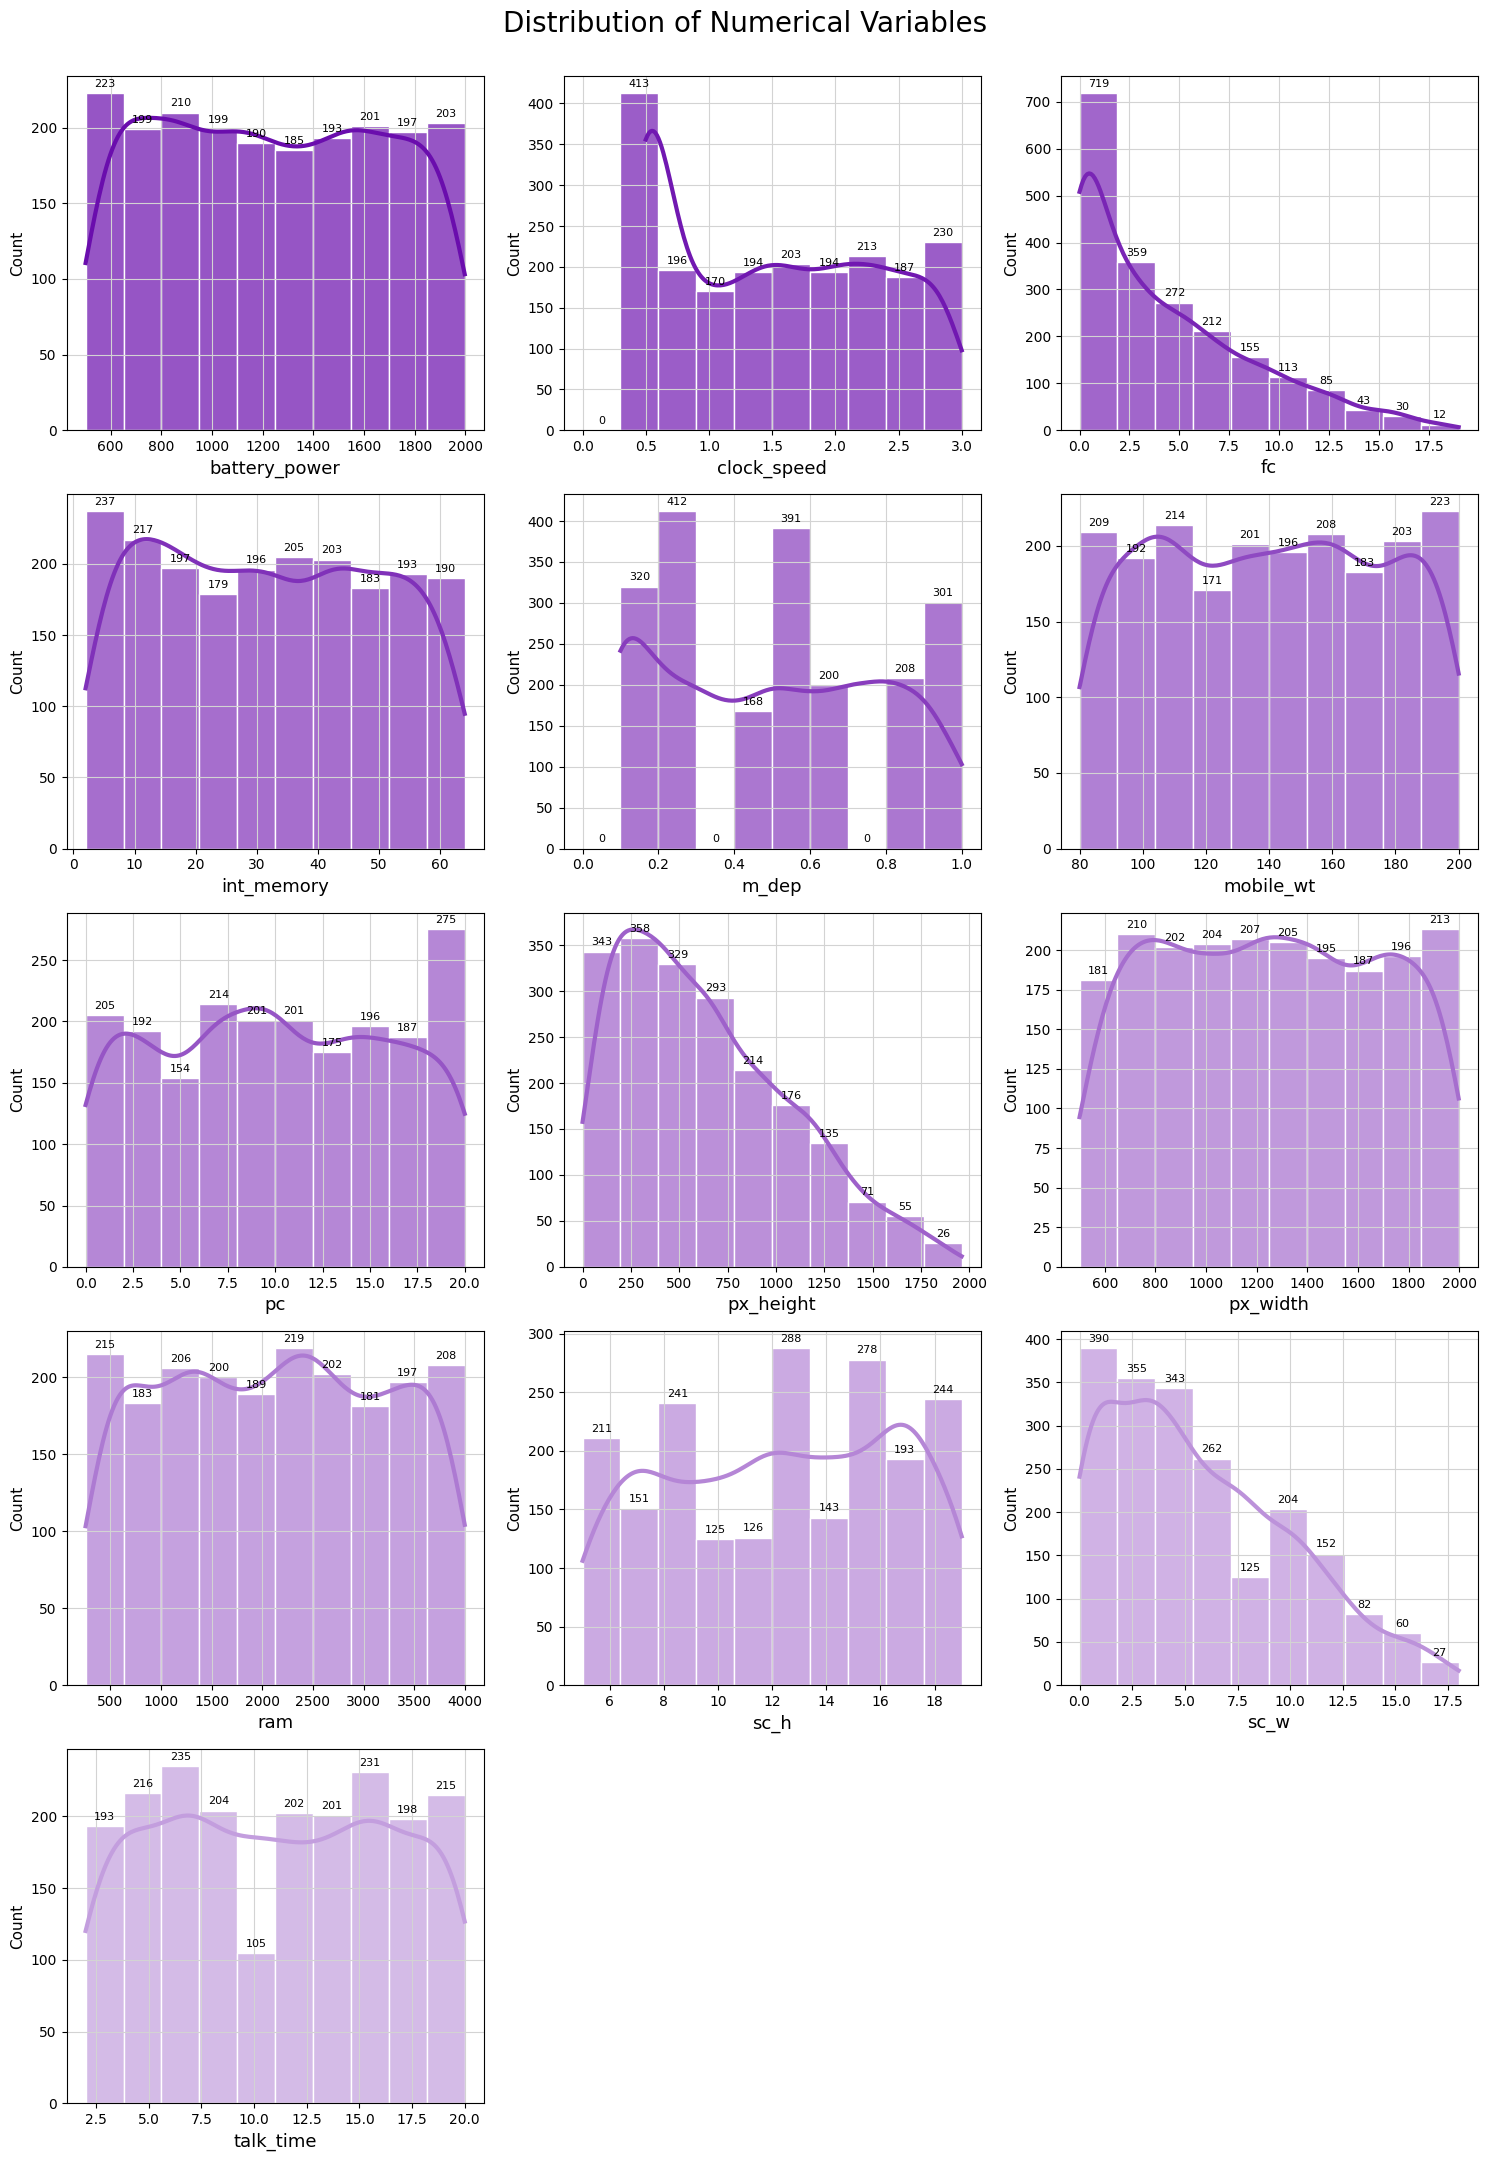

In [19]:
#############################################
# Data Understanding – Numerical Distributions & Skewness
#############################################

numdist_code_writer = student_a
start_time_numdist = now()

# Create custom colormap
cmap = colors.LinearSegmentedColormap.from_list("purple_contrast", ["#6A0DAD", "white"])

# A helper function to generate consistent purple shades
def get_color(index, total=20):
    norm = colors.Normalize(vmin=0, vmax=total)
    return colors.rgb2hex(cmap(norm(index)))

fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,22))

skewness_report = {}

for i, col in enumerate(df_numerical.columns):
    x = i // 3
    y = i % 3

    # Precompute histogram bin ranges
    values, bins = np.histogram(
        df_numerical[col],
        range=(np.floor(df_numerical[col].min()), np.ceil(df_numerical[col].max()))
    )

    # Plot histogram
    graph = sns.histplot(
        df_numerical[col],
        bins=bins,
        kde=True,
        ax=ax[x, y],
        color=get_color(i),
        alpha=0.7,
        edgecolor='white',
        line_kws={'lw': 3, 'color': '#6A0DAD'}
    )
    
    # Add count labels on top of the bars
    for container in graph.containers:
        ax[x, y].bar_label(container, fmt='%d', padding=3, fontsize=8) # fmt='%d' ensures integer counts

    ax[x, y].set_xlabel(col, fontsize=13)
    ax[x, y].set_ylabel('Count', fontsize=11)
    ax[x, y].grid(color='lightgrey')

    # Add skewness to report
    skewness_report[col] = float(df_numerical[col].skew())

# Remove unused axes
ax[4, 1].axis('off')
ax[4, 2].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

end_time_numdist = now()

#############################################
# Provenance Documentation
#############################################

numdist_ass_uuid_executor = "3cd26371-0f4c-4fc1-aa1f-69bdb4efaf77"

numdist_executor = [
    f':numerical_distribution prov:qualifiedAssociation :{numdist_ass_uuid_executor} .',
    f':{numdist_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{numdist_ass_uuid_executor} rdf:type prov:Association .',
    f':{numdist_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(numdist_executor, prefixes=prefixes)

numdist_ass_uuid_writer = "c81f8b66-42bd-4fa7-b7e6-cdabbb51c8e7"

numdist_comment = """
Histogram analysis shows the distribution of all numerical variables.
Most features appear unimodal with realistic ranges. Some variables such as px_height
and sc_w contain many values near zero, indicating potential noise.
Skewness was computed to identify asymmetry and assess preprocessing needs.
"""

numdist_activity = [
    ':numerical_distribution rdf:type prov:Activity .',
    ':numerical_distribution sc:isPartOf :data_understanding_phase .',
    f':numerical_distribution rdfs:comment """{numdist_comment}""" .',
    f':numerical_distribution prov:startedAtTime "{start_time_numdist}"^^xsd:dateTime .',
    f':numerical_distribution prov:endedAtTime "{end_time_numdist}"^^xsd:dateTime .',
    f':numerical_distribution prov:qualifiedAssociation :{numdist_ass_uuid_writer} .',
    f':{numdist_ass_uuid_writer} prov:agent :{numdist_code_writer} .',
    f':{numdist_ass_uuid_writer} rdf:type prov:Association .',
    f':{numdist_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # Output entity with skewness report
    ':numerical_skewness_report rdf:type prov:Entity .',
    f':numerical_skewness_report rdfs:comment """{json.dumps(skewness_report, indent=2)}""" .',
    ':numerical_skewness_report prov:wasGeneratedBy :numerical_distribution .',
]
engine.insert(numdist_activity, prefixes=prefixes)


In [20]:
#############################################
# Data Understanding – Outlier Detection (Z-score)
#############################################

outlier_code_writer = student_a

def detect_outliers(df: pd.DataFrame, threshold=3.0):
    """
    Detect outliers in all numeric columns using a z-score threshold.
    Returns a dict with count and indices per column.
    """
    results = {}
    df_num = df.select_dtypes(include=['int64', 'float64'])

    for col in df_num.columns:
        values = df_num[col].astype(float)
        mean = values.mean()
        std = values.std()

        if std == 0 or np.isnan(std):
            results[col] = {"count": 0, "indices": []}
            continue

        z_scores = (values - mean) / std
        mask = np.abs(z_scores) > threshold
        outlier_indices = list(values[mask].index)

        results[col] = {
            "count": len(outlier_indices),
            "indices": outlier_indices
        }

    return results

start_time_out = now()
outlier_report = detect_outliers(data, threshold=3.0)
end_time_out = now()

print("Outlier Detection Report:")
print(json.dumps(outlier_report, indent=2))

#############################################
# Provenance Documentation
#############################################

out_ass_uuid_executor = "72cd2efc-fc47-4501-a959-83f4bb403514"

outlier_executor = [
    f':outlier_detection prov:qualifiedAssociation :{out_ass_uuid_executor} .',
    f':{out_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{out_ass_uuid_executor} rdf:type prov:Association .',
    f':{out_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(outlier_executor, prefixes=prefixes)

out_ass_uuid_writer = "39ac1a27-2064-4f09-871c-49b91c2bb40c"

# Short human-readable summary tailored to your actual result
outlier_summary_text = """
Outlier detection was performed using a z-score threshold of 3.0 on all numeric variables.
The resulting report shows that no outliers were detected for most features; only 'fc'
(front camera megapixels) has 12 observations flagged as potential outliers.
All other variables have count = 0 outliers. This suggests the dataset is generally clean,
with a small number of unusually high front camera values that can be considered in the
data preparation phase.
"""

outlier_activity = [
    ':outlier_detection rdf:type prov:Activity .',
    ':outlier_detection sc:isPartOf :data_understanding_phase .',
    f':outlier_detection rdfs:comment """{outlier_summary_text}""" .',
    f':outlier_detection prov:startedAtTime "{start_time_out}"^^xsd:dateTime .',
    f':outlier_detection prov:endedAtTime "{end_time_out}"^^xsd:dateTime .',
    f':outlier_detection prov:qualifiedAssociation :{out_ass_uuid_writer} .',
    f':{out_ass_uuid_writer} prov:agent :{outlier_code_writer} .',
    f':{out_ass_uuid_writer} rdf:type prov:Association .',
    f':{out_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    # JSON report as provenance entity
    ':outlier_report rdf:type prov:Entity .',
    f':outlier_report rdfs:comment """{json.dumps(outlier_report, indent=2)}""" .',
    ':outlier_report prov:wasGeneratedBy :outlier_detection .',
]
engine.insert(outlier_activity, prefixes=prefixes)


Outlier Detection Report:
{
  "battery_power": {
    "count": 0,
    "indices": []
  },
  "blue": {
    "count": 0,
    "indices": []
  },
  "clock_speed": {
    "count": 0,
    "indices": []
  },
  "dual_sim": {
    "count": 0,
    "indices": []
  },
  "fc": {
    "count": 12,
    "indices": [
      95,
      226,
      305,
      1387,
      1406,
      1416,
      1554,
      1693,
      1705,
      1880,
      1882,
      1888
    ]
  },
  "four_g": {
    "count": 0,
    "indices": []
  },
  "int_memory": {
    "count": 0,
    "indices": []
  },
  "m_dep": {
    "count": 0,
    "indices": []
  },
  "mobile_wt": {
    "count": 0,
    "indices": []
  },
  "n_cores": {
    "count": 0,
    "indices": []
  },
  "pc": {
    "count": 0,
    "indices": []
  },
  "px_height": {
    "count": 0,
    "indices": []
  },
  "px_width": {
    "count": 0,
    "indices": []
  },
  "ram": {
    "count": 0,
    "indices": []
  },
  "sc_h": {
    "count": 0,
    "indices": []
  },
  "sc_w": {
    "coun

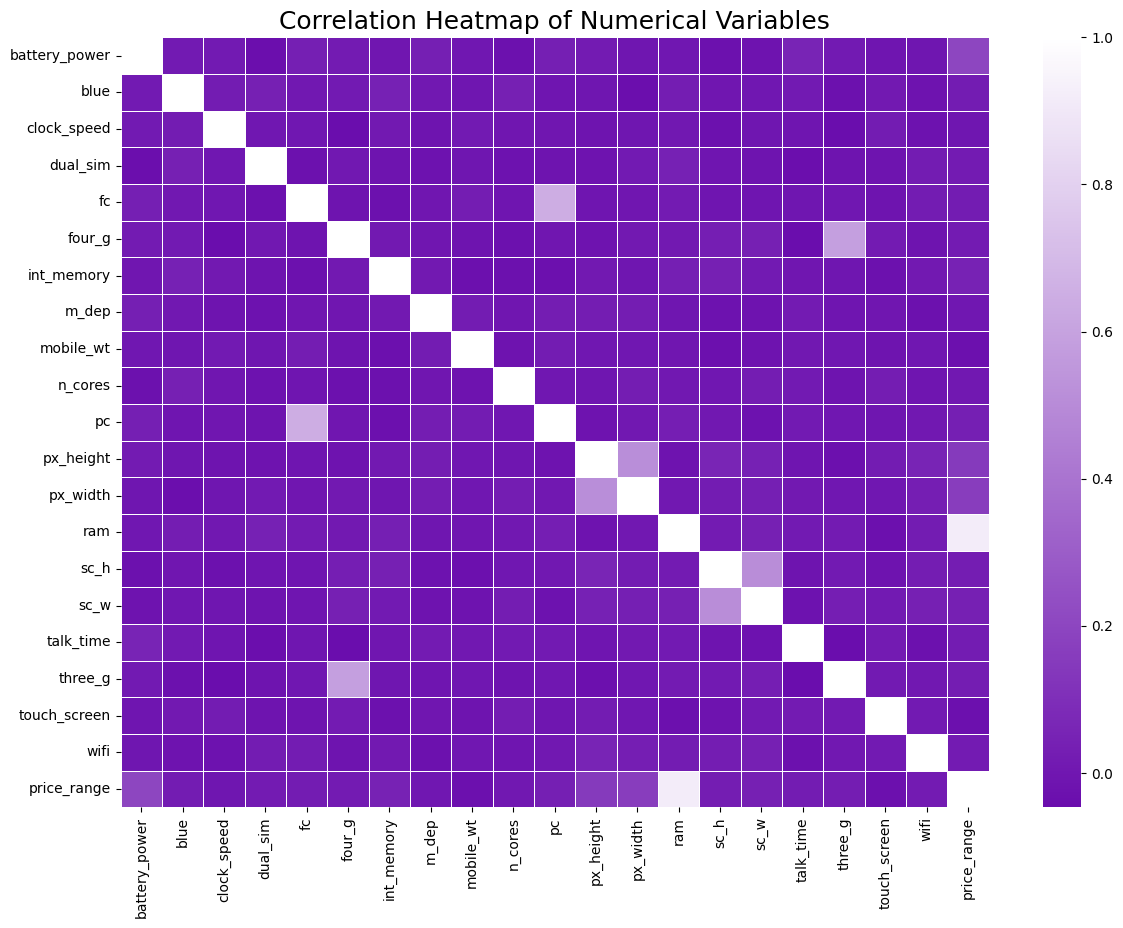

In [21]:
#############################################
# Data Understanding – Correlation Analysis
#############################################

corr_code_writer = student_a
start_time_corr = now()

# Compute correlation matrix
corr_matrix = data.corr(numeric_only=True)

# Create purple→white colormap
cmap = colors.LinearSegmentedColormap.from_list("purple_contrast", ["#6A0DAD", "white"])

plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=False, cmap=cmap, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=18)
plt.show()

end_time_corr = now()

#############################################
# Provenance Documentation
#############################################

corr_ass_uuid_executor = "f3ad17dc-89ac-4e02-b243-931b2d808bcf"

corr_executor = [
    f':correlation_analysis prov:qualifiedAssociation :{corr_ass_uuid_executor} .',
    f':{corr_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{corr_ass_uuid_executor} rdf:type prov:Association .',
    f':{corr_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(corr_executor, prefixes=prefixes)

corr_ass_uuid_writer = "99751a6f-b6c1-4f5c-bfe4-4e7eec268f90"

corr_comment = """
A correlation heatmap was computed for all numeric variables including the target price_range.
Most off-diagonal entries are dark, indicating generally weak linear correlations between
features. A few feature pairs (e.g. front vs. primary camera, screen height vs. screen width,
and pixel height vs. pixel width) show slightly higher positive correlations, but no very strong
multicollinearity is visible. Correlation between individual features and price_range appears
moderate at most. Overall, the heatmap suggests that features provide complementary
information without severe redundancy.
"""

corr_activity = [
    ':correlation_analysis rdf:type prov:Activity .',
    ':correlation_analysis sc:isPartOf :data_understanding_phase .',
    f':correlation_analysis rdfs:comment """{corr_comment}""" .',
    f':correlation_analysis prov:startedAtTime "{start_time_corr}"^^xsd:dateTime .',
    f':correlation_analysis prov:endedAtTime "{end_time_corr}"^^xsd:dateTime .',
    f':correlation_analysis prov:qualifiedAssociation :{corr_ass_uuid_writer} .',
    f':{corr_ass_uuid_writer} prov:agent :{corr_code_writer} .',
    f':{corr_ass_uuid_writer} rdf:type prov:Association .',
    f':{corr_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    ':corr_matrix rdf:type prov:Entity .',
    f':corr_matrix rdfs:comment """{corr_matrix.to_string()}""" .',
    ':corr_matrix prov:wasGeneratedBy :correlation_analysis .',
]
engine.insert(corr_activity, prefixes=prefixes)


In [22]:
#############################################
# Data Understanding – Data Quality Assessment
#############################################

dqa_code_writer = student_a
start_time_dqa = now()

# Programmatic checks
missing_values = data.isnull().sum().to_dict()
duplicate_count = int(data.duplicated().sum())

quality_report = {
    "missing_values": missing_values,
    "duplicate_rows": duplicate_count,
    "data_types": data.dtypes.astype(str).to_dict(),
    "value_range_issues": {
        "px_height_zero_count": int((data["px_height"] == 0).sum()),
        "sc_w_zero_count": int((data["sc_w"] == 0).sum())
    },
    "remarks": (
        "The dataset is complete: all 21 columns have 0 missing values and there are no "
        "duplicate rows. Numerical data types are consistent with the feature semantics. "
        "However, px_height has 2 zero values and sc_w has 180 zero values. These zeros are "
        "unlikely for real screens and may represent noisy or atypical records that should be "
        "handled carefully in the data preparation phase."
    )
}

print(json.dumps(quality_report, indent=2))

end_time_dqa = now()

#############################################
# Provenance Documentation
#############################################

dqa_ass_uuid_executor = "5c0d8c42-66d3-4c18-b925-e6711fea4b2a"

dqa_executor = [
    f':data_quality_assessment prov:qualifiedAssociation :{dqa_ass_uuid_executor} .',
    f':{dqa_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{dqa_ass_uuid_executor} rdf:type prov:Association .',
    f':{dqa_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(dqa_executor, prefixes=prefixes)

dqa_ass_uuid_writer = "8387990f-e5cc-49f7-91b8-a471bb71e62f"

dqa_comment = """
Data quality checks show that the dataset is internally very clean: there are no missing
values in any of the 21 columns and no duplicate rows. All features have numeric dtypes
consistent with their intended semantics (integers or floats).

A potential issue is that px_height contains 2 zero values and sc_w contains 180 zero values.
Zero screen height or width is implausible for real mobile devices and may indicate noisy,
special, or incorrectly recorded cases. These findings should be considered in the data
preparation phase (e.g., deciding whether to filter, impute, or keep these records).
"""

dqa_activity = [
    ':data_quality_assessment rdf:type prov:Activity .',
    ':data_quality_assessment sc:isPartOf :data_understanding_phase .',
    f':data_quality_assessment rdfs:comment """{dqa_comment}""" .',
    f':data_quality_assessment prov:startedAtTime "{start_time_dqa}"^^xsd:dateTime .',
    f':data_quality_assessment prov:endedAtTime "{end_time_dqa}"^^xsd:dateTime .',
    f':data_quality_assessment prov:qualifiedAssociation :{dqa_ass_uuid_writer} .',
    f':{dqa_ass_uuid_writer} prov:agent :{dqa_code_writer} .',
    f':{dqa_ass_uuid_writer} rdf:type prov:Association .',
    f':{dqa_ass_uuid_writer} prov:hadRole :{code_writer_role} .',

    ':data_quality_report rdf:type prov:Entity .',
    f':data_quality_report rdfs:comment """{json.dumps(quality_report, indent=2)}""" .',
    ':data_quality_report prov:wasGeneratedBy :data_quality_assessment .',
]
engine.insert(dqa_activity, prefixes=prefixes)



{
  "missing_values": {
    "battery_power": 0,
    "blue": 0,
    "clock_speed": 0,
    "dual_sim": 0,
    "fc": 0,
    "four_g": 0,
    "int_memory": 0,
    "m_dep": 0,
    "mobile_wt": 0,
    "n_cores": 0,
    "pc": 0,
    "px_height": 0,
    "px_width": 0,
    "ram": 0,
    "sc_h": 0,
    "sc_w": 0,
    "talk_time": 0,
    "three_g": 0,
    "touch_screen": 0,
    "wifi": 0,
    "price_range": 0
  },
  "duplicate_rows": 0,
  "data_types": {
    "battery_power": "int64",
    "blue": "int64",
    "clock_speed": "float64",
    "dual_sim": "int64",
    "fc": "int64",
    "four_g": "int64",
    "int_memory": "int64",
    "m_dep": "float64",
    "mobile_wt": "int64",
    "n_cores": "int64",
    "pc": "int64",
    "px_height": "int64",
    "px_width": "int64",
    "ram": "int64",
    "sc_h": "int64",
    "sc_w": "int64",
    "talk_time": "int64",
    "three_g": "int64",
    "touch_screen": "int64",
    "wifi": "int64",
    "price_range": "int64"
  },
  "value_range_issues": {
    "px_heigh

In [23]:
#############################################
# Data Understanding – 2e Ethical / Bias Aspects
#############################################

du_bias_code_writer = student_a
start_time_du_bias = now()
end_time_du_bias = now()

du_bias_ass_uuid_executor = "a8c4c0ba-0e4a-4b05-9bf7-0c7d7b3e1a10"

du_bias_executor = [
    ':du_bias_attributes rdf:type prov:Activity .',
    ':du_bias_attributes sc:isPartOf :data_understanding_phase .',
    f':du_bias_attributes prov:qualifiedAssociation :{du_bias_ass_uuid_executor} .',
    f':{du_bias_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{du_bias_ass_uuid_executor} rdf:type prov:Association .',
    f':{du_bias_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':du_bias_attributes prov:startedAtTime "{start_time_du_bias}"^^xsd:dateTime .',
    f':du_bias_attributes prov:endedAtTime "{end_time_du_bias}"^^xsd:dateTime .',
]
engine.insert(du_bias_executor, prefixes=prefixes)

du_bias_ass_uuid_writer = "f5f25b37-f9a6-4f64-9b7f-7c7c9ef63f0b"

du_bias_comment = """
The dataset contains no personal or sensitive attributes—only technical phone specifications.
The target price_range is perfectly balanced (500 samples per class).
Some device types are less frequent (e.g., rare feature combinations), but this affects model
performance rather than human fairness. No ethical or demographic bias risks are present.
"""

du_bias_activity = [
    ':du_bias_attributes_summary rdf:type prov:Entity .',
    ':du_bias_attributes_summary prov:wasGeneratedBy :du_bias_attributes .',
    ':du_bias_attributes_summary rdfs:label "2e Ethical / Bias Aspects" .',
    f':du_bias_attributes_summary rdfs:comment """{du_bias_comment}""" .',
]
engine.insert(du_bias_activity, prefixes=prefixes)


In [24]:
#############################################
# Data Understanding – 2f Risks & Expert Questions
#############################################

du_risk_code_writer = student_a
start_time_du_risk = now()
end_time_du_risk = now()

du_risk_ass_uuid_executor = "b3d0dafe-4b69-4e43-a14b-ae00e91c066b"

du_risk_executor = [
    ':du_risk_analysis rdf:type prov:Activity .',
    ':du_risk_analysis sc:isPartOf :data_understanding_phase .',
    f':du_risk_analysis prov:qualifiedAssociation :{du_risk_ass_uuid_executor} .',
    f':{du_risk_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{du_risk_ass_uuid_executor} rdf:type prov:Association .',
    f':{du_risk_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':du_risk_analysis prov:startedAtTime "{start_time_du_risk}"^^xsd:dateTime .',
    f':du_risk_analysis prov:endedAtTime "{end_time_du_risk}"^^xsd:dateTime .',
]
engine.insert(du_risk_executor, prefixes=prefixes)

du_risk_ass_uuid_writer = "d1f8ad9b-2a25-4343-9d59-02dcf845463b"

du_risk_comment = """
Potential risks include limited representativeness of devices in the dataset, since some 
feature combinations (e.g., very high camera MP or zero-sized screen dimensions) may not 
reflect real market distribution. Such records may introduce noise or skew model behavior. 
There is also a risk that the dataset does not capture newer technologies, causing future 
model drift.

Questions for an external domain expert include:
• Are zero values for px_height or sc_w technically valid or measurement artifacts?
• Are unusually high fc values real device specifications or outliers?
• Does the dataset represent a realistic mix of budget, mid-range, and high-end devices?
• Are any important device features missing that strongly influence real-world pricing?
"""

du_risk_activity = [
    ':du_risk_analysis_summary rdf:type prov:Entity .',
    ':du_risk_analysis_summary prov:wasGeneratedBy :du_risk_analysis .',
    ':du_risk_analysis_summary rdfs:label "2f Risks & Expert Questions" .',
    f':du_risk_analysis_summary rdfs:comment """{du_risk_comment}""" .',
]
engine.insert(du_risk_activity, prefixes=prefixes)


In [25]:
#############################################
# Data Understanding – 2g Actions Required for Data Preparation
#############################################

du_actions_code_writer = student_a
start_time_du_actions = now()
end_time_du_actions = now()

du_actions_ass_uuid_executor = "c0f5a0c0-75c7-4d7e-9b41-02e0cd5783ef"

du_actions_executor = [
    ':du_preparation_actions rdf:type prov:Activity .',
    ':du_preparation_actions sc:isPartOf :data_understanding_phase .',
    f':du_preparation_actions prov:qualifiedAssociation :{du_actions_ass_uuid_executor} .',
    f':{du_actions_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{du_actions_ass_uuid_executor} rdf:type prov:Association .',
    f':{du_actions_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
    f':du_preparation_actions prov:startedAtTime "{start_time_du_actions}"^^xsd:dateTime .',
    f':du_preparation_actions prov:endedAtTime "{end_time_du_actions}"^^xsd:dateTime .',
]
engine.insert(du_actions_executor, prefixes=prefixes)

du_actions_ass_uuid_writer = "e86ae014-75f4-4f89-878d-164f403c8db7"

du_actions_comment = """
Based on the data understanding analysis, the following actions are recommended for the
data preparation phase:

- Handle zero values in px_height (2 cases) and sc_w (180 cases), as such values are 
  unlikely for real devices; consider filtering or imputing them.

- Evaluate whether to treat the 12 outliers in fc (front camera MP) as noise or keep them,
  depending on domain expert clarification.

- Standardize or scale numerical features (e.g., RAM, battery_power, pixel resolution),
  since they vary across different ranges and may affect model performance.

- Convert categorical binary features (e.g., blue, dual_sim, four_g, three_g, wifi) to 
  consistent types if needed, although no encoding is required because they are already numeric.

- Review potential skewness in some numerical variables and apply transformations if needed 
  for algorithms sensitive to non-normality.

- Ensure proper train–validation–test splitting to maintain the balanced distribution 
  of price_range classes.
"""

du_actions_activity = [
    ':du_preparation_actions_summary rdf:type prov:Entity .',
    ':du_preparation_actions_summary prov:wasGeneratedBy :du_preparation_actions .',
    ':du_preparation_actions_summary rdfs:label "2g Actions Required for Data Preparation" .',
    f':du_preparation_actions_summary rdfs:comment """{du_actions_comment}""" .',
]
engine.insert(du_actions_activity, prefixes=prefixes)


## Data Preparation

In [65]:
## Each Activity that follows is part of the Data Preparation Phase

data_preparation_phase_executor = [
f':data_preparation_phase rdf:type prov:Activity .',
f':data_preparation_phase rdfs:label "Data Preparation Phase" .', 
]
engine.insert(data_preparation_phase_executor, prefixes=prefixes)

In [66]:
handle_outliers_code_writer = student_b
def handle_outliers(df:pd.DataFrame, outliers_report: dict) -> pd.DataFrame:
    # REMOVE OUTLIERS
    return df

start_time_td = now()
handle_outliers(data, outliers_report)
end_time_td = now()

#############################################
# Documentation
#############################################
# This is the continuation of the example from the Data Understanding phase above.
# There are three steps involved in this process:
# 1. activity creates a figure, report etc. => already done in data understanding phase
# 2. activity inspects the outcome and derives decisions => already done in data understanding phase
# 3. activity follows up on the decision by changing the data => in this case by removing the the outliers that were found

ro_ass_uuid_executor = "ec7e81e1-86ea-475a-a8d4-c7d8ee535488"
handle_outliers_executor = [
    f':handle_outliers prov:qualifiedAssociation :{ro_ass_uuid_executor} .',
    f':{ro_ass_uuid_executor} prov:agent :{executed_by} .',
    f':{ro_ass_uuid_executor} rdf:type prov:Association .',
    f':{ro_ass_uuid_executor} prov:hadRole :{code_executor_role} .',
]
engine.insert(handle_outliers_executor, prefixes=prefixes)

td_ass_uuid_writer = "1405f15a-3545-4014-a962-637f3c10a137"
td_comment = """
Removing all outliers that were identifying in the Data Understanding Phase.
"""
handle_outliers_activity = [
    ':handle_outliers rdf:type prov:Activity .',
    ':handle_outliers sc:isPartOf :data_preparation_phase .',
    ':handle_outliers rdfs:comment \'Data Preparation\' .', 
    f':handle_outliers rdfs:comment """{td_comment}""" .', 
    f':handle_outliers prov:startedAtTime "{start_time_td}"^^xsd:dateTime .',
    f':handle_outliers prov:endedAtTime "{end_time_td}"^^xsd:dateTime .',
    f':handle_outliers prov:qualifiedAssociation :{td_ass_uuid_writer} .',
    f':{td_ass_uuid_writer} prov:agent :{handle_outliers_code_writer} .',
    f':{td_ass_uuid_writer} rdf:type prov:Association .',
    f':{td_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    ':handle_outliers prov:used :data .',
    ':handle_outliers prov:used :outlier_decision .',
    ':cleaned_data rdf:type prov:Entity .',
    ':cleaned_data prov:wasGeneratedBy :handle_outliers .',
    ':cleaned_data prov:wasDerivedFrom :data .',
]
engine.insert(handle_outliers_activity, prefixes=prefixes)

**Continue with other tasks of the Data Preparation phase such as binning, scaling etc...**

In [67]:
# Your final transformed dataset should also be documented appropriately using Croissant, SI, etc.

prepared_data_triples = [
    ':prepared_data rdf:type prov:Entity .',
    ':prepared_data prov:wasDerivedFrom :cleaned_data .',
    ':prepared_data rdf:type sc:Dataset .',
    # ....
]
engine.insert(prepared_data_triples, prefixes=prefixes)

## Modeling

In [68]:
## Each Activity that follows is part of the Modeling Phase

modeling_phase_executor = [
f':modeling_phase rdf:type prov:Activity .',
f':modeling rdfs:label "Modeling Phase" .', 
]
engine.insert(modeling_phase_executor, prefixes=prefixes)


In [69]:
model_data_code_writer = student_a

#############################################
# Documentation 4a
#############################################

dma_ass_uuid_writer = "b3e840ab-ac23-415e-bd9c-6d00bb79c37a"
dma_comment = """
...
"""

identify_data_mining_algorithm_activity = [
    f':define_algorithm rdf:type prov:Activity .',
    f':define_algorithm sc:isPartOf :modeling_phase .',
    f':define_algorithm rdfs:comment """{dma_comment}""" .',
    f':define_algorithm prov:qualifiedAssociation :{dma_ass_uuid_writer} .',
    f':{dma_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{dma_ass_uuid_writer} rdf:type prov:Association .',
    f':{dma_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example algorithm definition
    f':random_forest_algorithm rdf:type mls:Algorithm .',
    f':random_forest_algorithm rdfs:label "Random Forest Algorithm" .',

    # example implementation
    f':random_forrest_classifier_implementation rdf:type mls:Implementation .',
    f':random_forrest_classifier_implementation rdfs:label "Scikit-learn RandomForestClassifier" .',
    f':random_forrest_classifier_implementation mls:implements :random_forest_algorithm .',
    f':random_forrest_classifier_implementation prov:wasGeneratedBy :define_algorithm .',

    
    # you can also define your Evaluation Measures here
    
    # example evaluation 
    f':r2_score_measure rdf:type mls:EvaluationMeasure .',
    f':r2_score_measure rdfs:label "R-squared Score" .',
    f':r2_score_measure rdfs:comment "xxx" .',
    f':r2_score_measure prov:wasGeneratedBy :define_algorithm .',

    
]
engine.insert(identify_data_mining_algorithm_activity, prefixes=prefixes)

In [70]:
#############################################
# Documentation 4b
#############################################

hp_ass_uuid_writer = "fff582a8-c5cd-4030-978b-9f56b603167c"
hp_comment = """
...
"""
identify_hp_activity = [
    f':identify_hyperparameters rdf:type prov:Activity .',
    f':identify_hyperparameters sc:isPartOf :modeling_phase .',
    f':identify_hyperparameters rdfs:comment """{hp_comment}""" .',
    f':identify_hyperparameters prov:qualifiedAssociation :{hp_ass_uuid_writer} .',
    f':{hp_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{hp_ass_uuid_writer} rdf:type prov:Association .',
    f':{hp_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    # example parameter
    f':hp_learning_rate rdf:type mls:HyperParameter .',
    f':hp_learning_rate rdfs:label "Learning Rate" .',
    f':hp_learning_rate rdfs:comment "..." .',
    f':random_forrest_classifier_implementation mls:hasHyperParameter :hp_learning_rate .',
    f':hp_learning_rate prov:wasGeneratedBy :identify_hyperparameters .',

    # continue with your identified hyperparameters
    
]
engine.insert(identify_hp_activity, prefixes=prefixes)

In [71]:
def split_data(df: pd.DataFrame):
    #do something
    return 'train_set', 'validation_set', 'test_set'

#############################################
# Documentation 4c
#############################################

### Define Train/Validation/Test splits
split_ass_uuid_writer = "fb58ae6c-9d58-44c9-ac7e-529111bdf7fc"
split_comment = """
...
"""
## Use your prepared dataset
input_dataset = ":prepared_data" 

define_split_activity = [
    f':define_data_split rdf:type prov:Activity .',
    f':define_data_split sc:isPartOf :modeling_phase .',
    f':define_data_split rdfs:comment "Train/Validation/Test Split Definition" .',
    f':define_data_split rdfs:comment """{split_comment}""" .',
    f':define_data_split prov:qualifiedAssociation :{split_ass_uuid_writer} .',
    f':{split_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{split_ass_uuid_writer} rdf:type prov:Association .',
    f':{split_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    f':define_data_split prov:used {input_dataset} .',
    
    # Training Set
    f':training_set rdf:type sc:Dataset .',
    f':training_set rdfs:label "Training Set" .',
    f':training_set prov:wasGeneratedBy :define_data_split .',
    f':training_set prov:wasDerivedFrom {input_dataset} .',
    f':training_set rdfs:comment "Contains xx samples" .', 

    # Validation Set
    f':validation_set rdf:type sc:Dataset .',
    f':validation_set rdfs:label "Validation Set" .',
    f':validation_set prov:wasGeneratedBy :define_data_split .',
    f':validation_set prov:wasDerivedFrom {input_dataset} .',
    f':validation_set rdfs:comment "Contains xx samples" .', 

    # Test Set
    f':test_set rdf:type sc:Dataset .',
    f':test_set rdfs:label "Test Set" .',
    f':test_set prov:wasGeneratedBy :define_data_split .',
    f':test_set prov:wasDerivedFrom {input_dataset} .',
    f':test_set rdfs:comment "Contains xx samples" .', 

    
]
engine.insert(define_split_activity, prefixes=prefixes)

In [72]:
def train_and_finetune_model(training_set, validation_set):
    # do something here

    # Try to automate as much documentation work as possible.
    # Define your training runs with their respective hyperparameter settings, etc.
    # Document each time a training run, model, its hp_settings, evaluations, ...  
    # Create performance figures/graphs

    return 'Find most suitable model'


start_time_tafm = now()
# train_and_finetune_model()
end_time_tafm = now() 


#############################################
# Documentation 4d & e & f
#############################################

tafm_ass_uuid_writer = "21d60fe3-c9ab-4a0a-bae7-b9fe9653c755"
tafm_comment = """
...
"""

# EXAMPLE output from your training
training_run1 = "run_1" 
model_run1 = "model_run1"
hp1_setting_run1 = "hp_setting_run1"
eval_train_run1 = "metric_train_run1"
eval_validation_run1 = "metric_validation_run1"


train_model_activity = [
    # Activity 
    f':train_and_finetune_model rdf:type prov:Activity .',
    f':train_and_finetune_model sc:isPartOf :modeling_phase .',
    f':train_and_finetune_model rdfs:comment """{tafm_comment}""" .',
    f':train_and_finetune_model prov:startedAtTime "{start_time_tafm}"^^xsd:dateTime .',
    f':train_and_finetune_model prov:endedAtTime "{end_time_tafm}"^^xsd:dateTime .',
    f':train_and_finetune_model prov:qualifiedAssociation :{tafm_ass_uuid_writer} .',
    f':{tafm_ass_uuid_writer} prov:agent :{model_data_code_writer} .',
    f':{tafm_ass_uuid_writer} rdf:type prov:Association .',
    f':{tafm_ass_uuid_writer} prov:hadRole :{code_writer_role} .',
    
    ########################################
    # ONE model run - automate everything below!

    # Parameter settings
    f':{hp1_setting_run1} rdf:type mls:HyperParameterSetting .',
    f':{hp1_setting_run1} mls:specifiedBy :hp_learning_rate .',
    f':{hp1_setting_run1} mls:hasValue "1.23"^^xsd:double .',
    f':{hp1_setting_run1} prov:wasGeneratedBy :train_and_finetune_model .',
    # add your further parameters

    # Describe your Run
    f':{training_run1} rdf:type mls:Run .',
    f':{training_run1} sc:isPartOf :train_and_finetune_model .',
    f':{training_run1} mls:realizes :random_forest_algorithm .',
    f':{training_run1} rdf:label "Training Run 1 with..." .',
    f':{training_run1} mls:executes :your_implementation .', 
    f':{training_run1} mls:hasInput :training_set .',
    f':{training_run1} mls:hasInput :validation_set .',
    f':{training_run1} mls:hasInput :{hp1_setting_run1} .',     
    # list all your used parameters here
    f':{training_run1} mls:hasOutput :{model_run1} .',
    f':{training_run1} mls:hasOutput :{eval_train_run1} .',
    f':{training_run1} mls:hasOutput :{eval_validation_run1} .',

    # Describe your Model
    f':{model_run1} rdf:type mls:Model .',
    f':{model_run1} prov:label "xxx" .',
    f':{model_run1} prov:wasGeneratedBy :{training_run1} .',
    f':{model_run1} mlso:trainedOn :training_set .',
    f':{model_run1} mlso:hasAlgorithmType :random_forest_algorithm .',

    # Describe your evaluations
    # You can have multiple evaluations per model 
    f':{eval_train_run1} rdf:type mls:ModelEvaluation .',
    f':{eval_train_run1} prov:wasGeneratedBy :{training_run1} .',
    f':{eval_train_run1} mls:hasValue "1.23"^^xsd:double .',
    f':{eval_train_run1} mls:specifiedBy :r2_score_measure .',
    f':{eval_train_run1} prov:used :training_set .',

    f':{eval_validation_run1} rdf:type mls:ModelEvaluation .',
    f':{eval_validation_run1} prov:wasGeneratedBy :{training_run1} .',
    f':{eval_validation_run1} mls:hasValue "1.23"^^xsd:double .',
    f':{eval_validation_run1} mls:specifiedBy :r2_score_measure .',
    f':{eval_validation_run1} prov:used :validation_set .',

    # Dont forget to document any visualizations

]
engine.insert(train_model_activity, prefixes=prefixes)


In [73]:
def retrain_model_full_data(training_set, validation_set):
    
    # create your
    return "Final Trained Model"


start_time_tafm = now()
# train_and_finetune_model()
end_time_tafm = now() 


#############################################
# Documentation 4g
#############################################

retrain_ass_uuid_writer = "96815ee0-524c-437b-b5fa-2e15b945c993" # Generate once

final_training_activity = ":retrain_final_model"
final_model = ":final_model_entity"

# Document the retraining activity.
# Hint: This activity is still part of the :modeling_phase

retrain_documentation = [
    # your documentation here    
]
engine.insert(retrain_documentation, prefixes=prefixes)


## Evaluation

In [74]:
## Each Activity that follows is part of the Evaluation Phase

evaluation_phase_executor = [
f':evaluation_phase rdf:type prov:Activity .',
f':evaluation_phase rdfs:label "Evaluation Phase" .', 
]
engine.insert(evaluation_phase_executor, prefixes=prefixes)

In [75]:
eval_code_writer = student_b
def evaluate_on_test_data(final_model, test_set):

    # Predict and evaluation on test data
        
    return 'Performance'

start_time_eval = now()
#evaluate_on_test_data()
end_time_eval = now() 

#############################################
# Documentation
#############################################

eval_ass_uuid = "7f1431e9-feed-429a-92ed-c131b23cbe79" # Generate once
final_model = ":final_model_entity" 
test_set = ":test_set" 

eval_comment = """
...
"""

evaluate_activity = [
    f':evaluate_final_model rdf:type prov:Activity .',
    f':evaluate_final_model sc:isPartOf :evaluation_phase .',
    f':evaluate_final_model rdfs:label "Final Model Evaluation on Test Set" .',
    f':evaluate_final_model rdfs:comment """{eval_comment}""" .',
    f':evaluate_final_model prov:startedAtTime "{start_time_eval}"^^xsd:dateTime .',
    f':evaluate_final_model prov:endedAtTime "{end_time_eval}"^^xsd:dateTime .',
    f':evaluate_final_model prov:qualifiedAssociation :{eval_ass_uuid} .',
    
    f':{eval_ass_uuid} prov:agent :{eval_code_writer} .',
    f':{eval_ass_uuid} rdf:type prov:Association .',
    f':{eval_ass_uuid} prov:hadRole :{code_writer_role} .',

    # Inputs
    f':evaluate_final_model prov:used {final_model} .',
    f':evaluate_final_model prov:used {test_set} .',
    
    # Reference to Data Mining Success Criteria from Phase 1
    f':evaluate_final_model prov:used :bu_data_mining_success_criteria .',

    # Document you final model performance
 
    # Hint: you evaluate bias in this way:
    f':bias_evaluation_result rdf:type mls:ModelEvaluation .',
    f':bias_evaluation_result prov:wasGeneratedBy :evaluate_final_model .',
    f':bias_evaluation_result rdfs:label "Bias Analysis" .',
    f':bias_evaluation_result rdfs:comment "..." .',
    
]
engine.insert(evaluate_activity, prefixes=prefixes)

## Deployment

In [76]:
## Each Activity that follows is part of the Deployment Phase

deployment_phase_executor = [
f':deployment_phase rdf:type prov:Activity .',
f':deployment_phase rdfs:label "Deployment Phase" .', 
]
engine.insert(deployment_phase_executor, prefixes=prefixes)

In [77]:
#############################################
# Documentation
#############################################

comparison_and_recommendations_comment = """
...
"""

ethical_aspects_comment = """
...
"""

monitoring_plan_comment = """
...
"""

reproducibility_reflection_comment = """
...
"""

dep_ass_uuid_executor = "72a921e0-1234-4567-89ab-cdef01234567" # Generate once
deployment_executor = [
f':plan_deployment rdf:type prov:Activity .',
f':plan_deployment sc:isPartOf :deployment_phase .', # Connect to Parent Phase
f':plan_deployment rdfs:label "Plan Deployment"@en .',

f':plan_deployment prov:qualifiedAssociation :{dep_ass_uuid_executor} .',
f':{dep_ass_uuid_executor} prov:agent :{executed_by} .',
f':{dep_ass_uuid_executor} rdf:type prov:Association .',
f':{dep_ass_uuid_executor} prov:hadRole :{code_executor_role} .', 
]
engine.insert(deployment_executor, prefixes=prefixes)


deployment_data_executor = [
#6a
f':dep_recommendations rdf:type prov:Entity .',
f':dep_recommendations prov:wasGeneratedBy :plan_deployment .',
f':dep_recommendations rdfs:label "6a Business Objectives Reflection and Deployment Recommendations" .',
f':dep_recommendations rdfs:comment """{comparison_and_recommendations_comment}""" .',
#6b
f':dep_ethical_risks rdf:type prov:Entity .',
f':dep_ethical_risks prov:wasGeneratedBy :plan_deployment .',
f':dep_ethical_risks rdfs:label "6b Ethical Aspects and Risks" .',
f':dep_ethical_risks rdfs:comment """{ethical_aspects_comment}""" .',
#6c
f':dep_monitoring_plan rdf:type prov:Entity .',
f':dep_monitoring_plan prov:wasGeneratedBy :plan_deployment .',
f':dep_monitoring_plan rdfs:label "6c Monitoring Plan" .',
f':dep_monitoring_plan rdfs:comment """{monitoring_plan_comment}""" .',
#6d
f':dep_reproducibility_reflection rdf:type prov:Entity .',
f':dep_reproducibility_reflection prov:wasGeneratedBy :plan_deployment .',
f':dep_reproducibility_reflection rdfs:label "6d Reproducibility Reflection" .',
f':dep_reproducibility_reflection rdfs:comment """{reproducibility_reflection_comment}""" .',

]
engine.insert(deployment_data_executor, prefixes=prefixes)

# Generate Latex Report

The following cells give you an example of how to automatically create a Latex Report from your provenance documentation.

Feel free to use the example provided. If you use it, you should adapt and extend it with relevant sections/tables/plots/... 

In [78]:
base_iri = f"https://starvers.ec.tuwien.ac.at/BI2025/{group_id}/"

In [79]:
# This cell includes cleaning functions

from datetime import datetime

def latex_escape(text: str | None) -> str:
    if text is None: return ""
    text = str(text)
    text = text.replace("\\", r"\textbackslash{}")
    pairs = [
        ("&", r"\&"), ("%", r"\%"), ("$", r"\$"), ("#", r"\#"), 
        ("_", r"\_"), ("{", r"\{"), ("}", r"\}"), 
        ("~", r"\textasciitilde{}"), ("^", r"\textasciicircum{}")
    ]
    for k, v in pairs:
        text = text.replace(k, v)
    return text

def clean_rdf(x) -> str:
    if hasattr(x, "toPython"): return str(x.toPython())
    if x is None: return ""
    s = str(x).strip()
    s = s.strip('"').strip("'")
    s = s.strip()
    if "^^" in s:
        s = s.split("^^")[0].strip('"')
        
    return s

def fmt_iso(ts: str) -> str:
    if not ts: return ""
    try:
        clean_ts = ts.split("^^")[0].strip('"')
        clean_ts = clean_ts.replace("Z", "+00:00") if clean_ts.endswith("Z") else clean_ts
        return datetime.fromisoformat(clean_ts).strftime("%Y-%m-%d %H:%M:%S")
    except:
        return latex_escape(str(ts))

In [80]:
# This cell includes exemplary queries for different phases


### Author Block
author_query = f"""
{prefix_header}
PREFIX iao: <http://purl.obolibrary.org/obo/>

SELECT DISTINCT ?uri ?given ?family ?matr WHERE {{
  VALUES ?uri {{ :{student_a} :{student_b} }}
  
  ?uri a foaf:Person .
  ?uri foaf:givenName ?given .
  ?uri foaf:familyName ?family .
  ?uri iao:IAO_0000219 ?matr .
}}
"""

res_authors = engine.query(author_query)
author_block_latex = ""

if not res_authors.empty: # type:ignore
    for _, row in res_authors.iterrows(): # type:ignore

        uri_str = str(row['uri'])
        given = latex_escape(clean_rdf(row['given']))
        family = latex_escape(clean_rdf(row['family']))
        matr = latex_escape(clean_rdf(row['matr']))
        if student_a in uri_str:
            responsibility = "Student A"
        elif student_b in uri_str:
            responsibility = "Student B"
        else:
            responsibility = "Student"
        
        author_block_latex += rf"""
          \author{{{given} {family}}}
          \authornote{{{responsibility}, Matr.Nr.: {matr}}}
          \affiliation{{
            \institution{{TU Wien}}
            \country{{Austria}}
          }}
          """

### Business Understanding example
bu_query = f"""
{prefix_header}

SELECT ?ds_comment ?bo_comment WHERE {{
  OPTIONAL {{ :bu_data_source_and_scenario rdfs:comment ?ds_comment . }}
  OPTIONAL {{ :bu_business_objectives rdfs:comment ?bo_comment . }}
}} LIMIT 1
"""
res_bu = engine.query(bu_query)
row_bu = res_bu.iloc[0] if not res_bu.empty else {} # type:ignore
bu_data_source = latex_escape(clean_rdf(row_bu.get("ds_comment", "")))
bu_objectives  = latex_escape(clean_rdf(row_bu.get("bo_comment", "")))


### Data Understanding examples
# Example Dataset Description
du_desc_query = f"""
{prefix_header}
SELECT ?desc WHERE {{ :raw_data sc:description ?desc . }} LIMIT 1
"""
res_du_desc = engine.query(du_desc_query)
row_du_desc = res_du_desc.iloc[0] if not res_du_desc.empty else {} # type:ignore
du_description = latex_escape(clean_rdf(row_du_desc.get("desc", "")))

# Example Feature Columns Table
du_query = f"""
{prefix_header}

SELECT ?name (SAMPLE(?dtypeRaw) as ?dtype) (SAMPLE(?descRaw) as ?desc) WHERE {{
  :raw_data cr:recordSet ?rs .
  ?rs cr:field ?field .
  ?field sc:name ?name .
  ?field sc:description ?descRaw .
  ?field cr:dataType ?dtypeRaw .
}} 
GROUP BY ?name
ORDER BY ?name
"""
res_du = engine.query(du_query)
du_rows = []
if not res_du.empty: # type:ignore
    for _, f in res_du.iterrows(): # type:ignore
        dtype_raw = clean_rdf(f.get("dtype", ""))
        if '#' in dtype_raw: dtype = dtype_raw.split('#')[-1]
        elif '/' in dtype_raw: dtype = dtype_raw.split('/')[-1]
        else: dtype = dtype_raw
        
        desc = clean_rdf(f.get("desc", ""))
        row_str = f"{latex_escape(clean_rdf(f['name']))} & {latex_escape(dtype)} & {latex_escape(desc)} \\\\"
        du_rows.append(row_str)
du_table_rows = "\n    ".join(du_rows)

### Modeling example
# Hyperparameters
hp_query = f"""
{prefix_header}

SELECT ?hpName (SAMPLE(?hpValRaw) as ?hpVal) (MAX(?hpDescRaw) as ?hpDesc) WHERE {{
  ?run sc:isPartOf :train_and_finetune_model .
  ?run mls:hasInput ?setting .
  ?setting a mls:HyperParameterSetting .
  ?setting mls:hasValue ?hpValRaw .
  ?setting mls:specifiedBy ?hpDef .
  ?hpDef rdfs:label ?hpName .
  OPTIONAL {{ ?hpDef rdfs:comment ?hpDescRaw . }}
}} 
GROUP BY ?hpName
ORDER BY ?hpName
"""
res_hp = engine.query(hp_query)
hp_rows = []
if not res_hp.empty: #type:ignore
    for _, row in res_hp.iterrows(): #type:ignore
        name = latex_escape(clean_rdf(row['hpName']))
        val  = latex_escape(clean_rdf(row['hpVal']))
        desc = latex_escape(clean_rdf(row.get('hpDesc', '')))
        hp_rows.append(rf"{name} & {desc} & {val} \\")

hp_table_rows = "\n    ".join(hp_rows)

# Run Info
run_query = f"""
{prefix_header}

SELECT ?algoLabel ?start ?end ?metricLabel ?metricVal WHERE {{
  OPTIONAL {{ :train_and_finetune_model prov:startedAtTime ?start ; prov:endedAtTime ?end . }}
  OPTIONAL {{
      ?run sc:isPartOf :train_and_finetune_model .
      ?run mls:realizes ?algo .
      ?algo rdfs:label ?algoLabel .
  }}
  OPTIONAL {{
    ?run sc:isPartOf :train_and_finetune_model .
    ?run mls:hasOutput ?eval .
    ?eval a mls:ModelEvaluation ; mls:hasValue ?metricVal .
    OPTIONAL {{ ?eval mls:specifiedBy ?m . ?m rdfs:label ?metricLabel . }}
  }}
}} LIMIT 1
"""
res_run = engine.query(run_query)
row_run = res_run.iloc[0] if not res_run.empty else {} #type:ignore
mod_algo  = latex_escape(clean_rdf(row_run.get("algoLabel", "")))
mod_start = latex_escape(fmt_iso(clean_rdf(row_run.get("start"))))
mod_end   = latex_escape(fmt_iso(clean_rdf(row_run.get("end"))))
mod_m_lbl = latex_escape(clean_rdf(row_run.get("metricLabel", "")))
raw_val = clean_rdf(row_run.get('metricVal', ''))
mod_m_val = f"{float(raw_val):.4f}" if raw_val else ""

print("Data extraction done.")

Data extraction done.


The following includes the Latex report itself. It fills in the query-results from the cell before. The ACM Template is already filled. 
Make sure that you update Student A and B accordingly.

In [81]:
latex_content = rf"""\documentclass[sigconf]{{acmart}}

\AtBeginDocument{{ \providecommand\BibTeX{{ Bib\TeX }} }}
\setcopyright{{acmlicensed}}
\copyrightyear{{2025}}
\acmYear{{2025}}
\acmDOI{{XXXXXXX.XXXXXXX}}

\acmConference[BI 2025]{{Business Intelligence}}{{-}}{{-}}

\begin{{document}}

\title{{BI2025 Experiment Report - Group {group_id}}}
%% ---Authors: Dynamically added ---
{author_block_latex}

\begin{{abstract}}
  This report documents the machine learning experiment for Group {group_id}, following the CRISP-DM process model.
\end{{abstract}}

\ccsdesc[500]{{Computing methodologies~Machine learning}}
\keywords{{CRISP-DM, Provenance, Knowledge Graph, Machine Learning}}

\maketitle

%% --- 1. Business Understanding ---
\section{{Business Understanding}}

\subsection{{Data Source and Scenario}}
{bu_data_source}

\subsection{{Business Objectives}}
{bu_objectives}

%% --- 2. Data Understanding ---
\section{{Data Understanding}}
\textbf{{Dataset Description:}} {du_description}

The following features were identified in the dataset:

\begin{{table}}[h]
  \caption{{Raw Data Features}}
  \label{{tab:features}}
  \begin{{tabular}}{{lp{{0.2\linewidth}}p{{0.4\linewidth}}}}
    \toprule
    \textbf{{Feature Name}} & \textbf{{Data Type}} & \textbf{{Description}} \\
    \midrule
    {du_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

%% --- 3. Data Preparation ---
\section{{Data Preparation}}
\subsection{{Data Cleaning}}
Describe your Data preparation steps here and include respective graph data.


%% --- 4. Modeling ---
\section{{Modeling}}

\subsection{{Hyperparameter Configuration}}
The model was trained using the following hyperparameter settings:

\begin{{table}}[h]
  \caption{{Hyperparameter Settings}}
  \label{{tab:hyperparams}}
  \begin{{tabular}}{{lp{{0.4\linewidth}}l}}
    \toprule
    \textbf{{Parameter}} & \textbf{{Description}} & \textbf{{Value}} \\
    \midrule
    {hp_table_rows}
    \bottomrule
  \end{{tabular}}
\end{{table}}

\subsection{{Training Run}}
A training run was executed with the following characteristics:
\begin{{itemize}}
    \item \textbf{{Algorithm:}} {mod_algo}
    \item \textbf{{Start Time:}} {mod_start}
    \item \textbf{{End Time:}} {mod_end}
    \item \textbf{{Result:}} {mod_m_lbl} = {mod_m_val}
\end{{itemize}}

%% --- 5. Evaluation ---
\section{{Evaluation}}

%% --- 6. Deployment ---
\section{{Deployment}}

\section{{Conclusion}}

\end{{document}}
"""

In [82]:
# This cell stores the Latex report to the data/report directory

out_dir = os.path.join("data", "report")
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, "experiment_report.tex")

with open(out_path, "w", encoding="utf-8") as f:
    f.write(latex_content)

print(f"Report written to: {out_path}")

Report written to: data/report/experiment_report.tex
